<a href="https://colab.research.google.com/github/epicskills1/Final_yr_Project/blob/main/Data_Visualisation_Tox21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import io
from sklearn.metrics import roc_auc_score

Train Labels Shape: (12060, 12)
Test Labels Shape: (647, 12)
Train Features Shape: (12060, 1644)
Test Features Shape: (647, 1644)
Missing values in y_tr: 43238
Missing values in y_te: 791


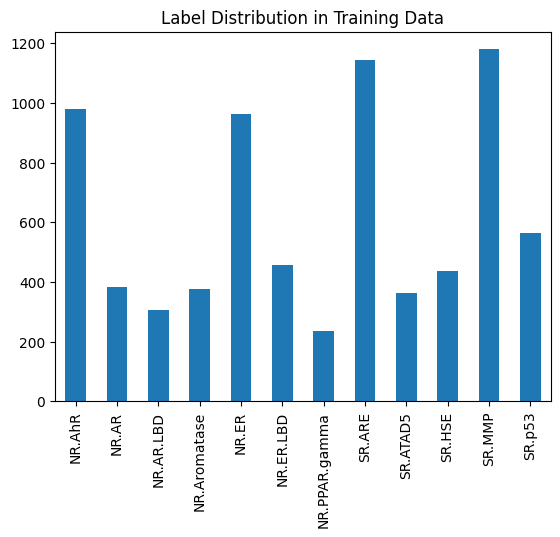

Feature Mean: [4.21919136e+06 1.45101792e+01 2.01192670e+00 2.54628184e+00
 1.40015339e+01]
Feature Std Dev: [1.17562065e+07 4.78699918e+00 1.95915336e-01 4.35052829e-01
 8.09072263e+00]


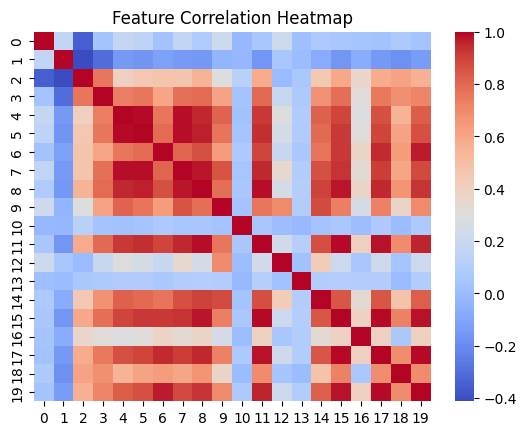

Sparsity of Training Features: 0.5055
Label Counts per Task:
     NR.AhR  NR.AR  NR.AR.LBD  NR.Aromatase  NR.ER  NR.ER.LBD  NR.PPAR.gamma  \
0.0    7460   9271       8545          7062   6998       8584           8214   
1.0     981    383        307           378    964        456            237   

     SR.ARE  SR.ATAD5  SR.HSE  SR.MMP  SR.p53  
0.0    6255      9000    7979    6378    8338  
1.0    1146       363     438    1180     565  
Head of Training Labels:
                 NR.AhR  NR.AR  NR.AR.LBD  NR.Aromatase  NR.ER  NR.ER.LBD  \
NCGC00178831-03     NaN    NaN        NaN           NaN    NaN        NaN   
NCGC00166114-03     NaN    NaN        NaN           NaN    NaN        NaN   
NCGC00263563-01     NaN    NaN        NaN           NaN    NaN        NaN   
NCGC00013058-02     NaN    NaN        NaN           NaN    NaN        NaN   
NCGC00167516-01     NaN    0.0        NaN           NaN    NaN        NaN   

                 NR.PPAR.gamma  SR.ARE  SR.ATAD5  SR.HSE  SR.MMP  

In [ ]:
y_tr = pd.read_csv('tox21_labels_train.csv.gz', index_col=0, compression='gzip')
y_te = pd.read_csv('tox21_labels_test.csv.gz', index_col=0, compression='gzip')
x_tr_dense = pd.read_csv('tox21_dense_train.csv.gz', index_col=0, compression='gzip').values
x_te_dense = pd.read_csv('tox21_dense_test.csv.gz', index_col=0, compression='gzip').values
x_tr_sparse = io.mmread('tox21_sparse_train.mtx.gz').tocsc()
x_te_sparse = io.mmread('tox21_sparse_test.mtx.gz').tocsc()

sparse_col_idx = ((x_tr_sparse > 0).mean(0) > 0.05).A.ravel()
x_tr = np.hstack([x_tr_dense, x_tr_sparse[:, sparse_col_idx].A])
x_te = np.hstack([x_te_dense, x_te_sparse[:, sparse_col_idx].A])

print("Train Labels Shape:", y_tr.shape)
print("Test Labels Shape:", y_te.shape)
print("Train Features Shape:", x_tr.shape)
print("Test Features Shape:", x_te.shape)

print("Missing values in y_tr:", y_tr.isnull().sum().sum())
print("Missing values in y_te:", y_te.isnull().sum().sum())

y_tr.sum(axis=0).plot(kind='bar', title='Label Distribution in Training Data')
plt.show()

print("Feature Mean:", np.mean(x_tr, axis=0)[:5])
print("Feature Std Dev:", np.std(x_tr, axis=0)[:5])

sample_features = pd.DataFrame(x_tr[:, :20])
sns.heatmap(sample_features.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

sparsity = 1.0 - (np.count_nonzero(x_tr) / x_tr.size)
print(f"Sparsity of Training Features: {sparsity:.4f}")

label_counts = y_tr.apply(pd.Series.value_counts).fillna(0)
print("Label Counts per Task:")
print(label_counts)

print("Head of Training Labels:")
print(y_tr.head())

print("Head of Test Labels:")
print(y_te.head())

print("Head of Training Dense Features:")
print(pd.DataFrame(x_tr_dense).head())

print("Head of Test Dense Features:")
print(pd.DataFrame(x_te_dense).head())

Handling Missing Values

In [ ]:
y_tr.fillna(0, inplace=True)
y_te.fillna(0, inplace=True)
print(y_tr.head())
print(y_te.head())

                 NR.AhR  NR.AR  NR.AR.LBD  NR.Aromatase  NR.ER  NR.ER.LBD  \
NCGC00178831-03     0.0    0.0        0.0           0.0    0.0        0.0   
NCGC00166114-03     0.0    0.0        0.0           0.0    0.0        0.0   
NCGC00263563-01     0.0    0.0        0.0           0.0    0.0        0.0   
NCGC00013058-02     0.0    0.0        0.0           0.0    0.0        0.0   
NCGC00167516-01     0.0    0.0        0.0           0.0    0.0        0.0   

                 NR.PPAR.gamma  SR.ARE  SR.ATAD5  SR.HSE  SR.MMP  SR.p53  
NCGC00178831-03            0.0     0.0       0.0     0.0     0.0     0.0  
NCGC00166114-03            0.0     0.0       0.0     0.0     0.0     0.0  
NCGC00263563-01            0.0     0.0       0.0     0.0     0.0     0.0  
NCGC00013058-02            0.0     0.0       0.0     1.0     0.0     0.0  
NCGC00167516-01            0.0     0.0       0.0     0.0     0.0     0.0  
                 NR.AhR  NR.AR  NR.AR.LBD  NR.Aromatase  NR.ER  NR.ER.LBD  \
NCGC002619

Handling Imbalance